#BANK LOAN ANALYSIS REPORT

##Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #for diff 2d graphs
import seaborn as sns #built on matplotlib but it is used for more statistical analysis and for more advanced plotting
import warnings #while writting the code if we have any error it will give more detailed way of warning msg
import plotly.express as px #interactive advanced charts

In [4]:
# importing the data
df = pd.read_excel("/content/financial_loan.xlsx")
display(df.head())


,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2021-02-11,2021-09-13,2021-04-13,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,2021-01-01,2021-12-14,2021-01-15,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,2021-01-05,2021-12-12,2021-01-09,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2021-02-25,2021-12-12,2021-03-12,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,2021-01-01,2021-12-14,2021-01-15,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


###Metadata of the data

In [17]:
print("Number of rows:",df.shape[0])


Number of rows: 38576


In [18]:
print("Number of columns:",df.shape[1])

Number of columns: 24


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     38576 non-null  int64         
 1   address_state          38576 non-null  object        
 2   application_type       38576 non-null  object        
 3   emp_length             38576 non-null  object        
 4   emp_title              37138 non-null  object        
 5   grade                  38576 non-null  object        
 6   home_ownership         38576 non-null  object        
 7   issue_date             38576 non-null  datetime64[ns]
 8   last_credit_pull_date  38576 non-null  datetime64[ns]
 9   last_payment_date      38576 non-null  datetime64[ns]
 10  loan_status            38576 non-null  object        
 11  next_payment_date      38576 non-null  datetime64[ns]
 12  member_id              38576 non-null  int64         
 13  p

In [22]:
#Data type
df.dtypes

,0
id,int64
address_state,object
application_type,object
emp_length,object
emp_title,object
grade,object
home_ownership,object
issue_date,datetime64[ns]
last_credit_pull_date,datetime64[ns]
last_payment_date,datetime64[ns]


In [25]:
df.describe()

,id,issue_date,last_credit_pull_date,last_payment_date,next_payment_date,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,38576,38576,38576,38576,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,2021-07-16 02:31:35.562007040,2021-06-08 13:36:34.193280512,2021-06-26 09:52:08.909166080,2021-07-26 20:42:20.605557760,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
min,5.473400e+04,2021-01-01 00:00:00,2021-01-08 00:00:00,2021-01-08 00:00:00,2021-02-08 00:00:00,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,2021-04-11 00:00:00,2021-04-15 00:00:00,2021-03-16 00:00:00,2021-04-16 00:00:00,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,2021-07-11 00:00:00,2021-05-16 00:00:00,2021-06-14 00:00:00,2021-07-14 00:00:00,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,2021-10-11 00:00:00,2021-08-13 00:00:00,2021-09-15 00:00:00,2021-10-15 00:00:00,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,2021-12-12 00:00:00,2022-01-20 00:00:00,2021-12-15 00:00:00,2022-01-15 00:00:00,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000
std,2.113246e+05,NaN,NaN,NaN,NaN,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777


###1. Total loan applications

In [27]:
total_loan_application = df['id'].count()
print("Total loan applications:", total_loan_application)

Total loan applications: 38576


MTD Total loan applications

In [37]:
# Get the latest issue date
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

# Filter for the same year and month
mtd_data = df[(df['issue_date'].dt.year == latest_year) &
              (df['issue_date'].dt.month == latest_month)]

# Count loan applications
mtd_loan_applications = mtd_data['id'].count()

# Print result
print(f"MTD Total loan applications for {latest_issue_date.strftime('%B %Y')}: {mtd_loan_applications}")


MTD Total loan applications for December 2021: 4314


In [42]:
# Get the latest issue date
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

# Filter for the same year and month
mtd_data = df[(df['issue_date'].dt.year == latest_year) &
              (df['issue_date'].dt.month == latest_month)]

# Count loan applications
mtd_loan_applications = mtd_data['id'].count()

# Print result
print(f"MTD Total loan applications:", mtd_loan_applications)


MTD Total loan applications: 4314


###2. Total Funded Amount

In [44]:
total_funded_amount = df['loan_amount'].sum()
print("Total Funded Amount:", total_funded_amount)

Total Funded Amount: 435757075


In [49]:
#Now the above is a very big number so lets make it in millions and upto 2 decimal points
total_funded_amount = df['loan_amount'].sum()
total_funded_amount_millions = total_funded_amount / 1000000
total_funded_amount_millions = round(total_funded_amount_millions, 2)
print("Total Funded Amount: $", total_funded_amount_millions,"M")

Total Funded Amount: $ 435.76 M


In [54]:
total_funded_amount = df['loan_amount'].sum()
total_funded_amount_millions = total_funded_amount / 1000000
print("Total Funded Amount: ${:.2f}M".format(total_funded_amount_millions))

Total Funded Amount: $435.76M


MTD - Total Funded Amount

In [61]:
# Get the latest issue date
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

# Filter for the same year and month
mtd_data = df[(df['issue_date'].dt.year == latest_year) &
              (df['issue_date'].dt.month == latest_month)]
mtd_total_funded_amount = mtd_data['loan_amount'].sum()
mtd_total_funded_amount_millions = mtd_total_funded_amount / 1000000

print("MTD Total Funded Amount: ${:.2f}M".format(mtd_total_funded_amount_millions))


MTD Total Funded Amount: $53.98M


###3. Total Amount Received

In [65]:
total_amount_received = df['total_payment'].sum()
print("Total Amount Received:", total_amount_received)

Total Amount Received: 473070933


In [63]:
total_amount_received = df['total_payment'].sum()
total_amount_received_millions = total_amount_received / 1000000
print("Total Amount Received: ${:.2f}M".format(total_amount_received_millions))

Total Amount Received: $473.07M


MTD - Total Amount Received

In [66]:
# Get the latest issue date
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

# Filter for the same year and month
mtd_data = df[(df['issue_date'].dt.year == latest_year) &
              (df['issue_date'].dt.month == latest_month)]

mtd_total_amount_received = mtd_data['total_payment'].sum()
mtd_ttotal_amount_received_millions = mtd_total_amount_received / 1000000

print("MTD Total Amount Received: ${:.2f}M".format(mtd_ttotal_amount_received_millions))


MTD Total Amount Received: $58.07M


###4. Average Intrest Rate

In [5]:
average_intrest_rate = df['int_rate'].mean() #.mean() -- because we have to find the avg
print("Average Intrest Rate:", average_intrest_rate)

Average Intrest Rate: 0.12048831397760265


In [11]:
average_intrest_rate = df['int_rate'].mean()*100
print("Average Intrest Rate: {:.2f}%".format(average_intrest_rate))

Average Intrest Rate: 12.05%


###5. Average Debt-to-income Ratio(DTI)

In [15]:
average_dti = df['dti'].mean()*100
print("Average Debt-to-income Ratio(DTI): {:.2f}%".format(average_dti))

Average Debt-to-income Ratio(DTI): 13.33%


##Good Loan Metrics

In [21]:
good_loans = df[df['loan_status'].isin(["Fully Paid", "Current"])]

total_loan_applications = df['id'].count()
good_loan_applications = good_loans['id'].count()
good_loan_funded_amount = good_loans['loan_amount'].sum()
good_loan_received = good_loans['total_payment'].sum()
good_loan_funded_amount_millions = good_loan_funded_amount / 1000000
good_loan_received_millions = good_loan_received / 1000000
good_loan_percentage = (good_loan_applications / total_loan_applications) * 100
print ("Good Loan Applications:", good_loan_applications)
print ("Good Loan Funded Amount (in Millions): ${:.2f}M".format(good_loan_funded_amount_millions))
print("Good Loan Total Received (in Millions): ${:.2f}M".format(good_loan_received_millions))
print("Percentage of Good Loan Applications: {:.2f}%".format(good_loan_percentage))

Good Loan Applications: 33243
Good Loan Funded Amount (in Millions): $370.22M
Good Loan Total Received (in Millions): $435.79M
Percentage of Good Loan Applications: 86.18%


##Bad Loan Metrics

In [26]:
bad_loans = df[df['loan_status'].isin(["Charged Off"])]

total_loan_applications = df['id'].count()
bad_loan_applications = bad_loans['id'].count()
bad_loan_funded_amount = bad_loans['loan_amount'].sum()
bad_loan_received = bad_loans['total_payment'].sum()
bad_loan_funded_amount_millions = bad_loan_funded_amount / 1000000
bad_loan_received_millions = bad_loan_received / 1000000
bad_loan_percentage = (bad_loan_applications / total_loan_applications) * 100
print ("Bad Loan Applications:", bad_loan_applications)
print ("Bad Loan Funded Amount (in Millions): ${:.2f}M".format(bad_loan_funded_amount_millions))
print("Bad Loan Total Received (in Millions): ${:.2f}M".format(bad_loan_received_millions))
print("Percentage of Bad Loan Applications: {:.2f}%".format(bad_loan_percentage))

Bad Loan Applications: 5333
Bad Loan Funded Amount (in Millions): $65.53M
Bad Loan Total Received (in Millions): $37.28M
Percentage of Bad Loan Applications: 13.82%


#CHARTS

##1. Monthly Trends By Issue Date (Line/Area Chart)

###1A. Monthly Trends By Issue Date for Total Funded Amount

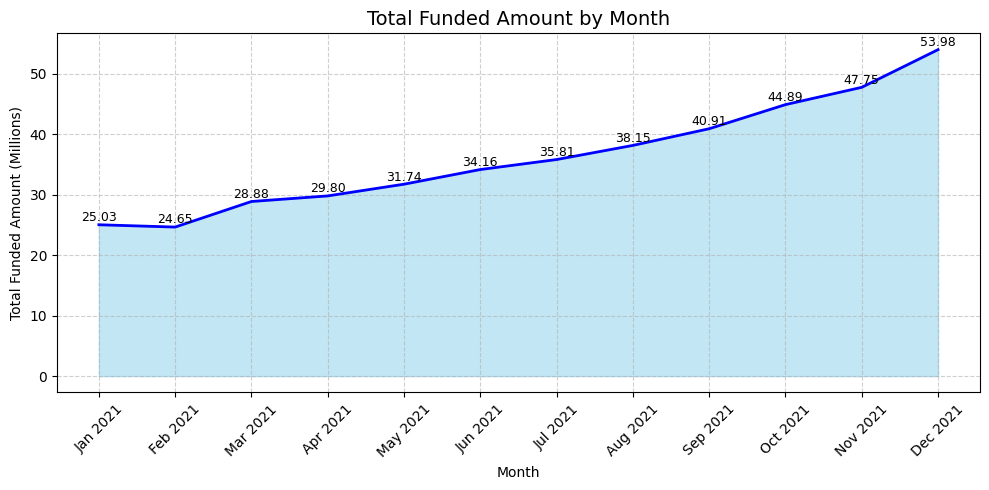

In [39]:
monthly_funded = (
    df.sort_values('issue_date')
      .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
      .groupby("month_name", sort=False)['loan_amount']

      .sum()
      .div(1_000_000)
      .reset_index(name='loan_amount_millions')
)

plt.figure(figsize=(10, 5))
plt.fill_between(monthly_funded['month_name'], monthly_funded ['loan_amount_millions'], color='skyblue', alpha=0.5)
plt.plot(monthly_funded['month_name'], monthly_funded ['loan_amount_millions'], color='blue', linewidth=2)


for i, row in monthly_funded.iterrows():
    plt.text(i, row['loan_amount_millions'] + 0.1, f"{row['loan_amount_millions']:.2f}",
             ha='center', va= 'bottom', fontsize=9, rotation=0, color= 'black')

plt.title('Total Funded Amount by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Funded Amount (Millions)')
plt.xticks(ticks=range(len(monthly_funded)), labels=monthly_funded['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

###1B. Monthly Trends by Issue Date for Total Amount Received

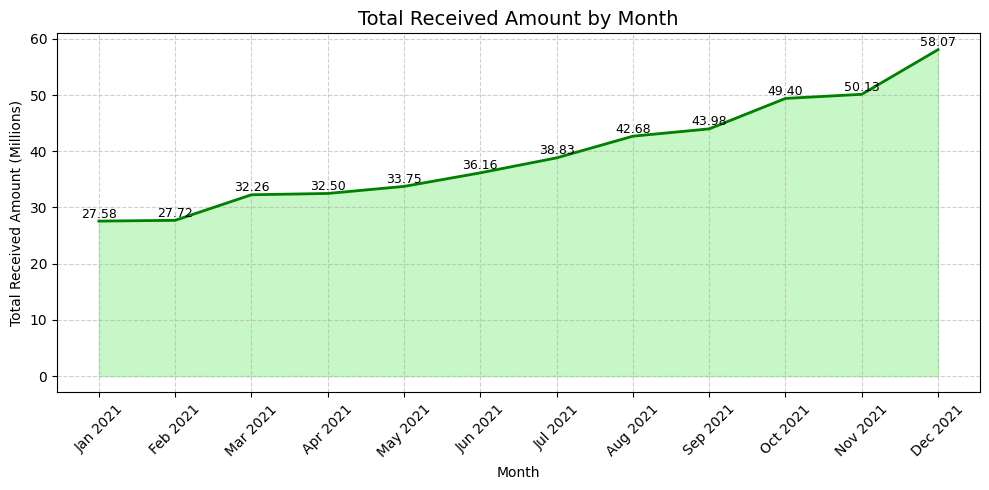

In [40]:
monthly_received = (
    df.sort_values('issue_date')
      .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
      .groupby("month_name", sort=False)['total_payment']

      .sum()
      .div(1_000_000)
      .reset_index(name='received_amount_millions')
)

plt.figure(figsize=(10, 5))
plt.fill_between(monthly_received['month_name'], monthly_received ['received_amount_millions'],
                 color='lightgreen', alpha=0.5)
plt.plot(monthly_received['month_name'], monthly_received ['received_amount_millions'],
         color='green', linewidth=2)


for i, row in monthly_received.iterrows():
    plt.text(i, row['received_amount_millions'] + 0.1, f"{row['received_amount_millions']:.2f}",
             ha='center', va= 'bottom', fontsize=9, rotation=0, color= 'black')

plt.title('Total Received Amount by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Total Received Amount (Millions)')
plt.xticks(ticks=range(len(monthly_received)), labels=monthly_received['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

###1C. Monthly Trends by Issue Date for Total Loan Applications

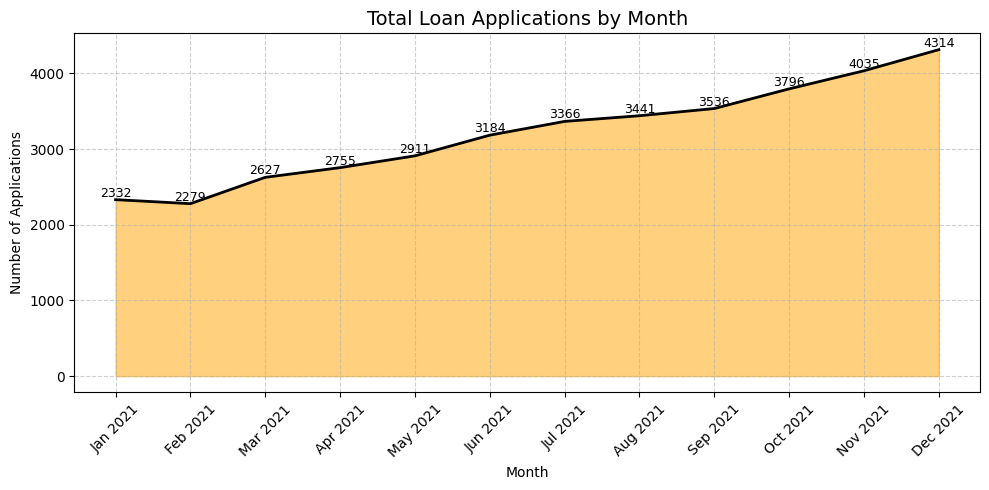

In [11]:
monthly_applications = (
  df.sort_values('issue_date')
    .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
    .groupby('month_name', sort=False)['id']
    .count()
    .reset_index(name='Loan_applications_count')
)

plt.figure(figsize=(10, 5))
plt.fill_between(monthly_applications['month_name'], monthly_applications['Loan_applications_count'],
                  color='orange', alpha=0.5)
plt.plot(monthly_applications['month_name'], monthly_applications['Loan_applications_count'],
                  color='black', linewidth=2)

for i, row in monthly_applications.iterrows():
    plt.text(i, row['Loan_applications_count'] + 0.5, f"{row['Loan_applications_count']}",
             ha='center', va='bottom', fontsize=9, rotation=0, color='black')


plt.title('Total Loan Applications by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Applications')
plt.xticks(ticks=range(len(monthly_applications)), labels=monthly_applications['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

##2. Regional Analysis by State (Bar Chart)

###2A. Regional Analysis by State for Total Funded Amount

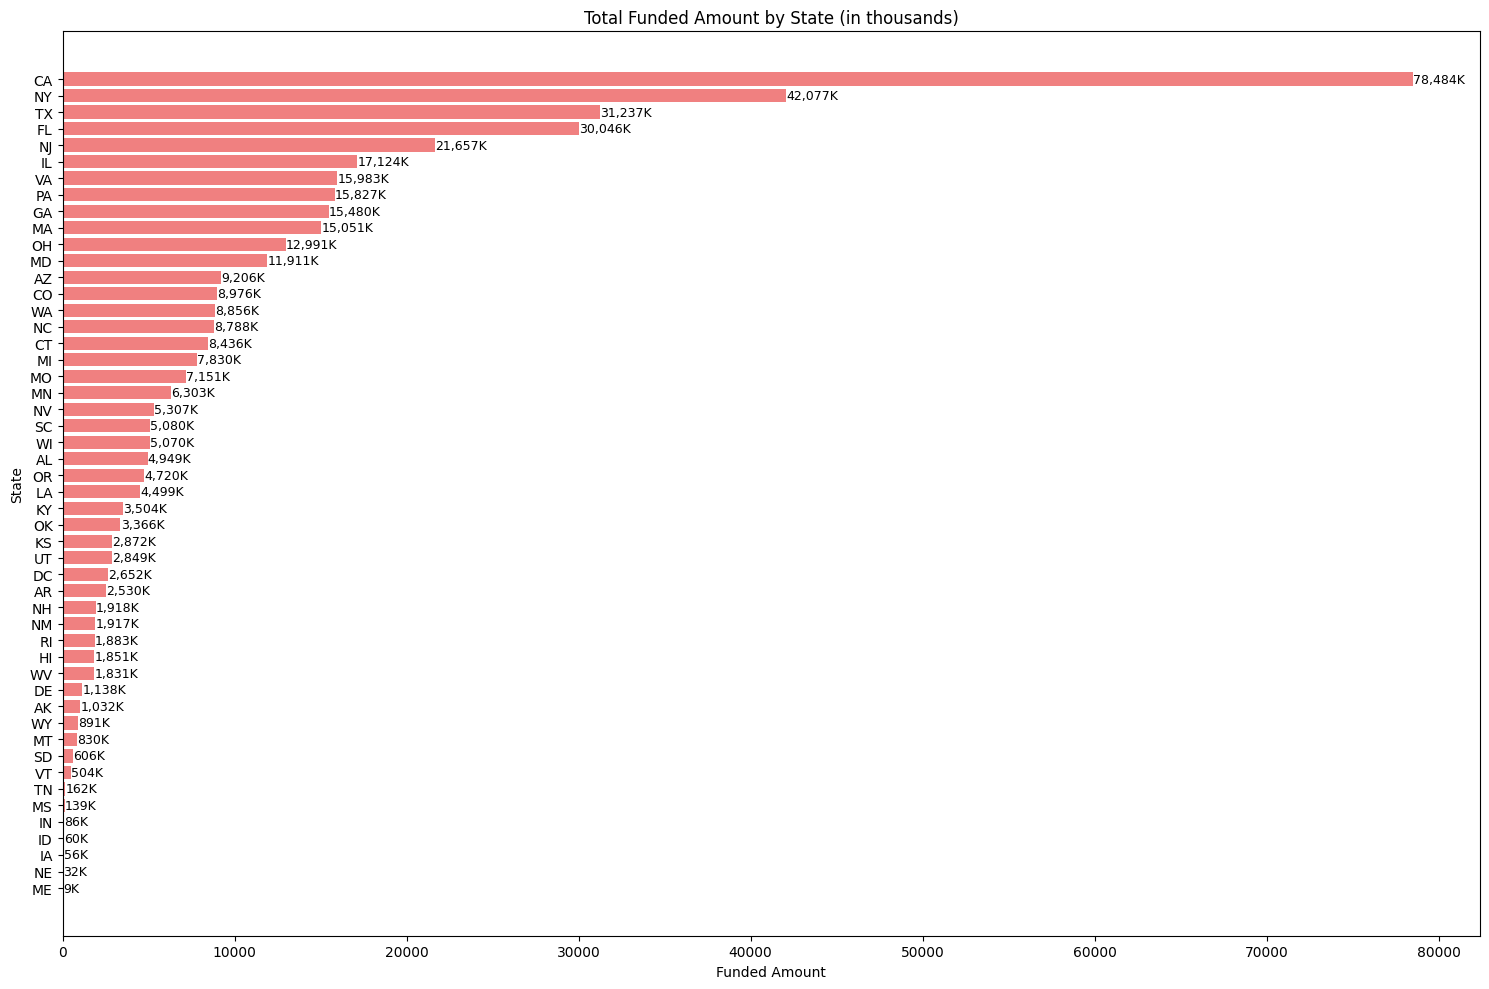

In [25]:
state_funding = df.groupby('address_state')['loan_amount'].sum().sort_values(ascending=True)
state_funding_thousands = state_funding / 1000

plt.figure(figsize=(15, 10))
bars = plt.barh(state_funding_thousands.index, state_funding_thousands.values, color='lightcoral')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height() / 2,
             f"{width:,.0f}K",
             va='center', fontsize=9)

plt.title('Total Funded Amount by State (in thousands)')
plt.xlabel('Funded Amount')
plt.ylabel('State')
plt.tight_layout()
plt.show()

###2B. Regional Analysis by State for Total Amount Received

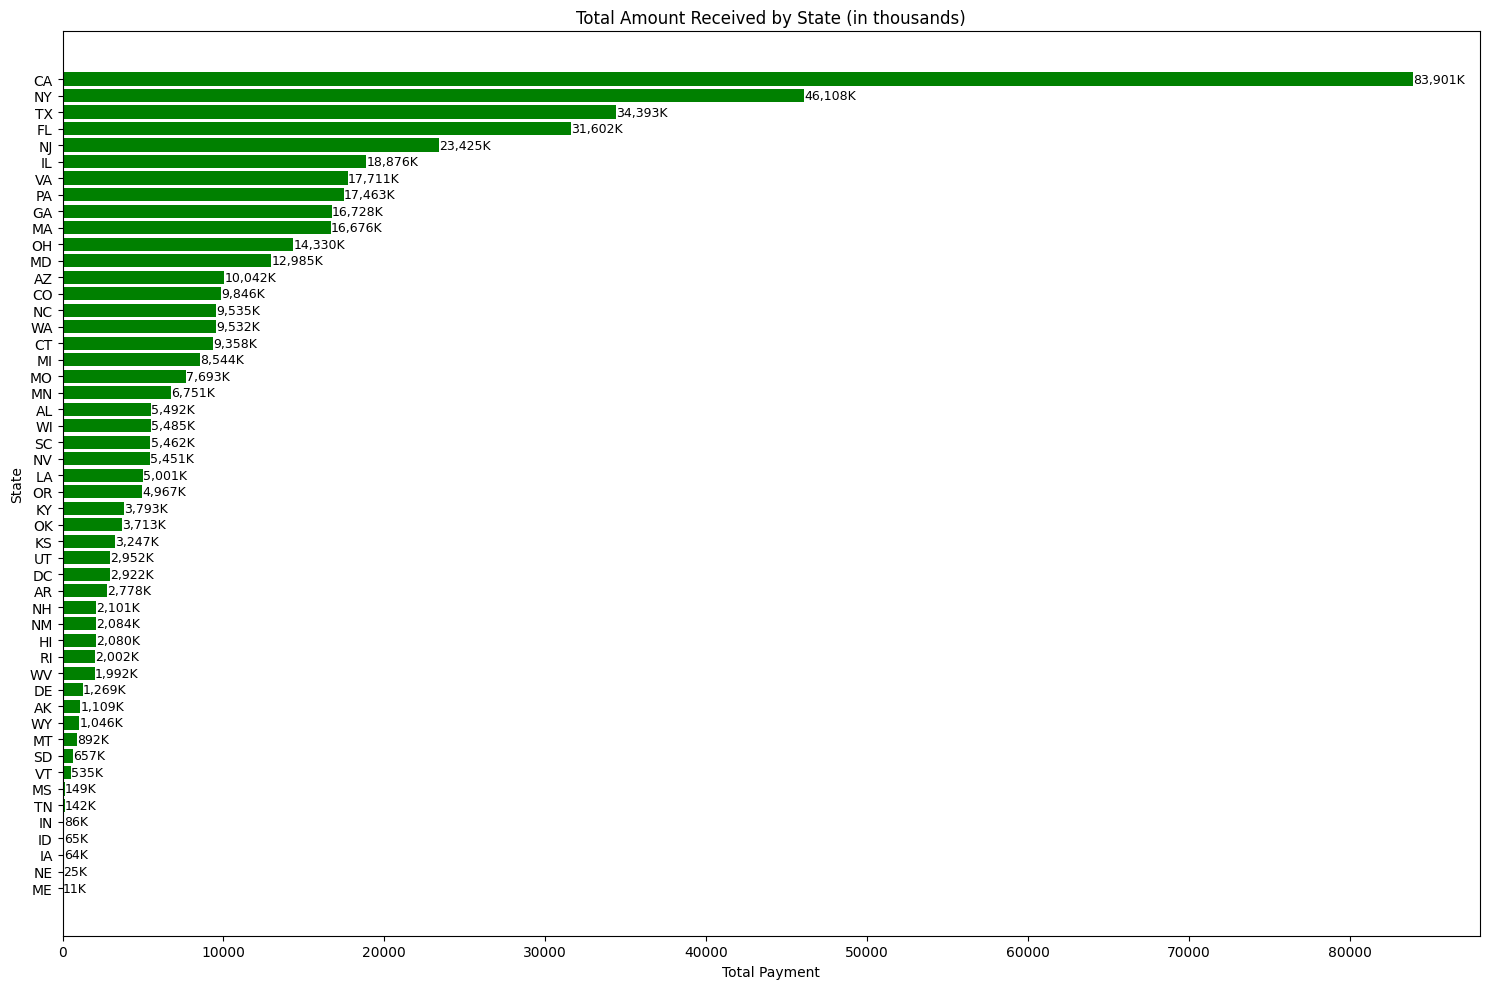

In [35]:
state_received = df.groupby('address_state')['total_payment'].sum().sort_values(ascending=True)
state_received_thousands = state_received / 1000

plt.figure(figsize=(15, 10))
bars = plt.barh(state_received_thousands.index, state_received_thousands.values, color='green')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height() / 2,
             f"{width:,.0f}K",
             va='center', fontsize=9)

plt.title('Total Amount Received by State (in thousands)')
plt.xlabel('Total Payment')
plt.ylabel('State')
plt.tight_layout()
plt.show()

###2C. Regional Analysis by State for Total Loan Applications

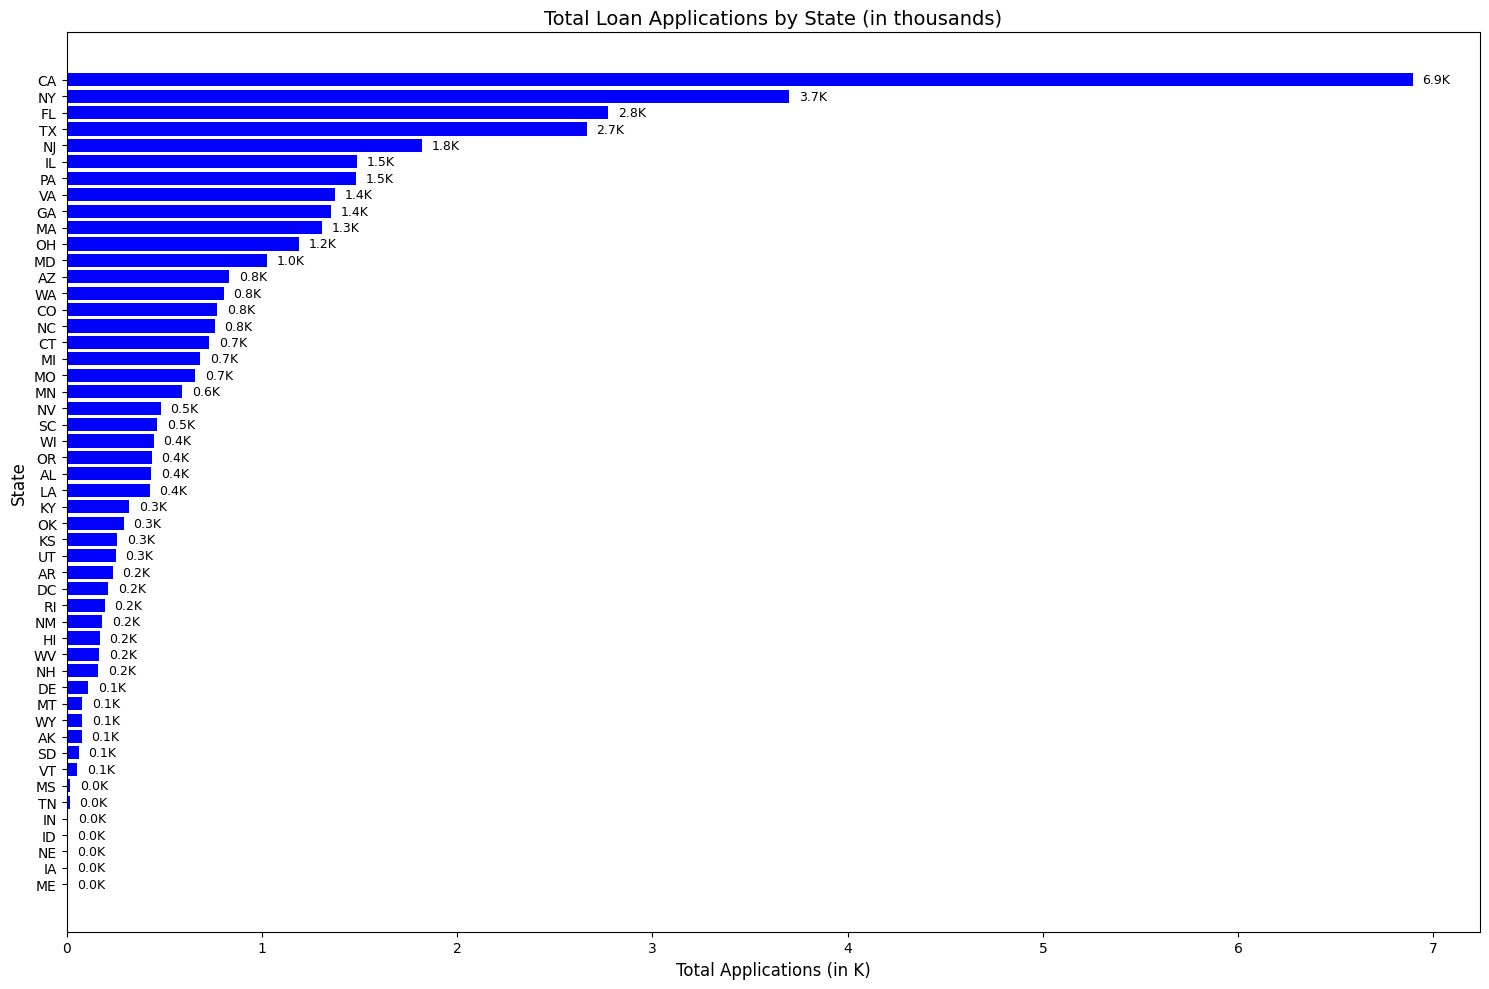

In [45]:
import matplotlib.pyplot as plt

# Group by state and count total loan applications
state_applications = df.groupby('address_state')['application_type'].count().sort_values(ascending=True)

# Convert to thousands for readability
state_applications_thousands = state_applications / 1000

# Plot horizontal bar chart
plt.figure(figsize=(15, 10))
bars = plt.barh(state_applications_thousands.index, state_applications_thousands.values, color='blue')

# Add labels to bars
for bar, value in zip(bars, state_applications_thousands.values):
    plt.text(value + 0.05, bar.get_y() + bar.get_height() / 2,
             f"{value:.1f}K",  # keep 1 decimal place
             va='center', fontsize=9)

# Titles and labels
plt.title('Total Loan Applications by State (in thousands)', fontsize=14)
plt.xlabel('Total Applications (in K)', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.tight_layout()
plt.show()


##3. Loan Term Analysis (Donut Chart)

###3A. Loan Term Analysis for Total Funded Amount

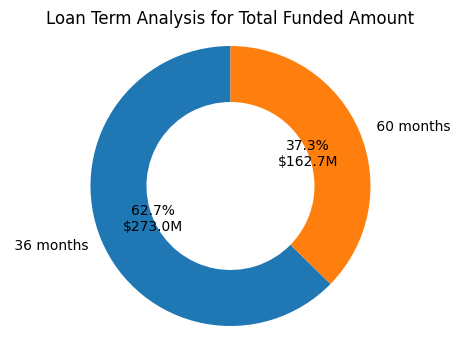

In [53]:
term_funding_millions = df.groupby('term')['loan_amount'].sum() / 1000000

plt.figure(figsize=(5, 4))
plt.pie(
    term_funding_millions,
    labels=term_funding_millions.index,
    autopct=lambda p: f"{p:.1f}%\n${p*sum(term_funding_millions)/100:.1f}M",
    startangle=90,
    wedgeprops={'width': 0.4}
)
plt.title('Loan Term Analysis for Total Funded Amount')
plt.axis('equal')
plt.show()

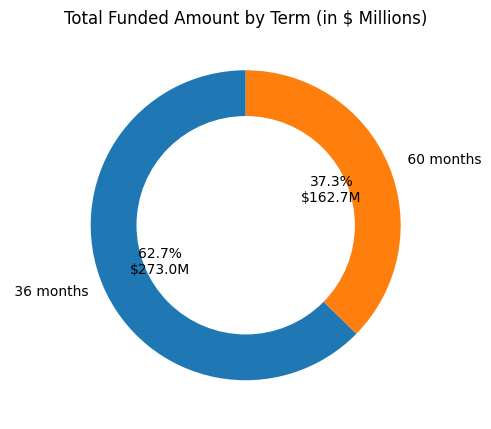

In [56]:
#OR

term_funding_millions = df.groupby('term')['loan_amount'].sum() / 1000000

plt.figure(figsize=(5, 8))
plt.pie(
    term_funding_millions,
    labels=term_funding_millions.index,
    autopct=lambda p: f"{p:.1f}%\n${p*sum(term_funding_millions)/100:.1f}M",
    startangle=90,
    wedgeprops={'width': 0.4}
)

plt.gca().add_artist(plt.Circle((0, 0), 0.70, color='white'))
plt.title('Total Funded Amount by Term (in $ Millions)')
plt.show()

###3B. Loan Term Analysis for Total Amount Received

###3C. Loan Term Analysis for Total Loan Applications

##4. Employee Length Analysis (Bar Chart)

###4A. Employee Length by Total Funded Amount

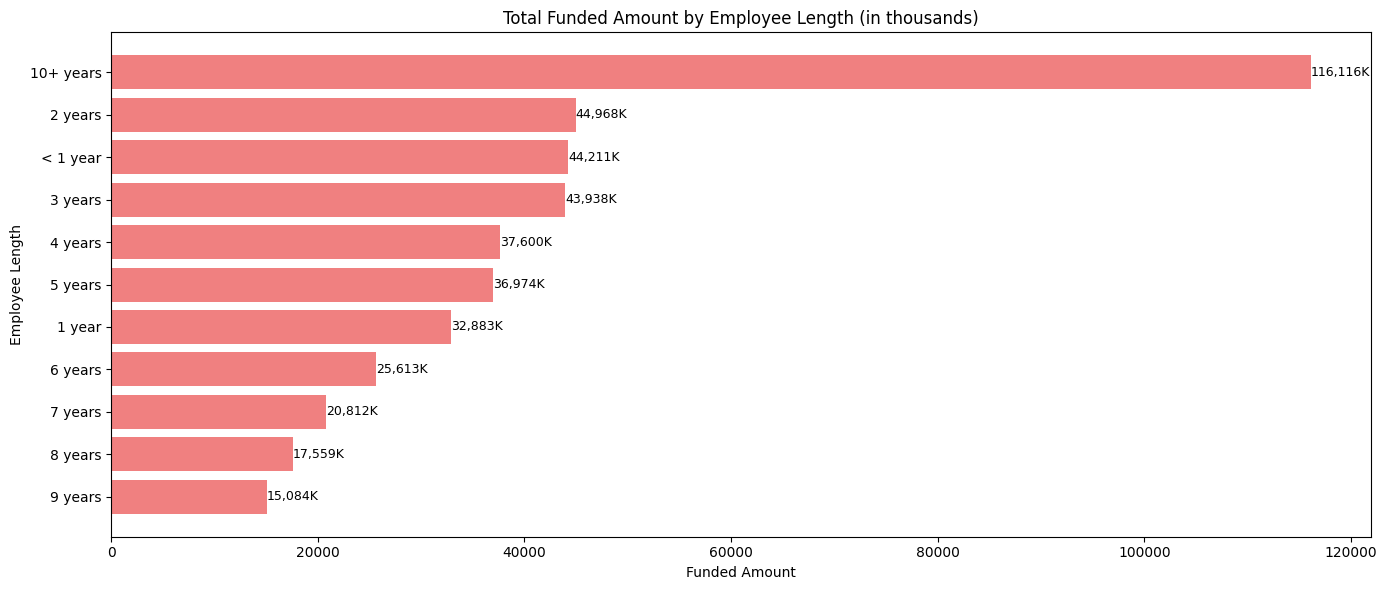

In [65]:
emp_funding = df.groupby('emp_length')['loan_amount'].sum().sort_values()/1000

plt.figure(figsize=(14, 6))
bars = plt.barh(emp_funding.index, emp_funding.values, color='lightcoral')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height() / 2,
             f"{width:,.0f}K",
             va='center', fontsize=9)

plt.title('Total Funded Amount by Employee Length (in thousands)')
plt.xlabel('Funded Amount')
plt.ylabel('Employee Length')
plt.tight_layout()
plt.show()

###4B. Employee Length by Total Amount Received

###4C. Employee Length by Total Loan Applications

##5. Loan Purpose Breakdown (Bar Chart)

###5A. Loan Purpose Breakdown by Total Funded Amount

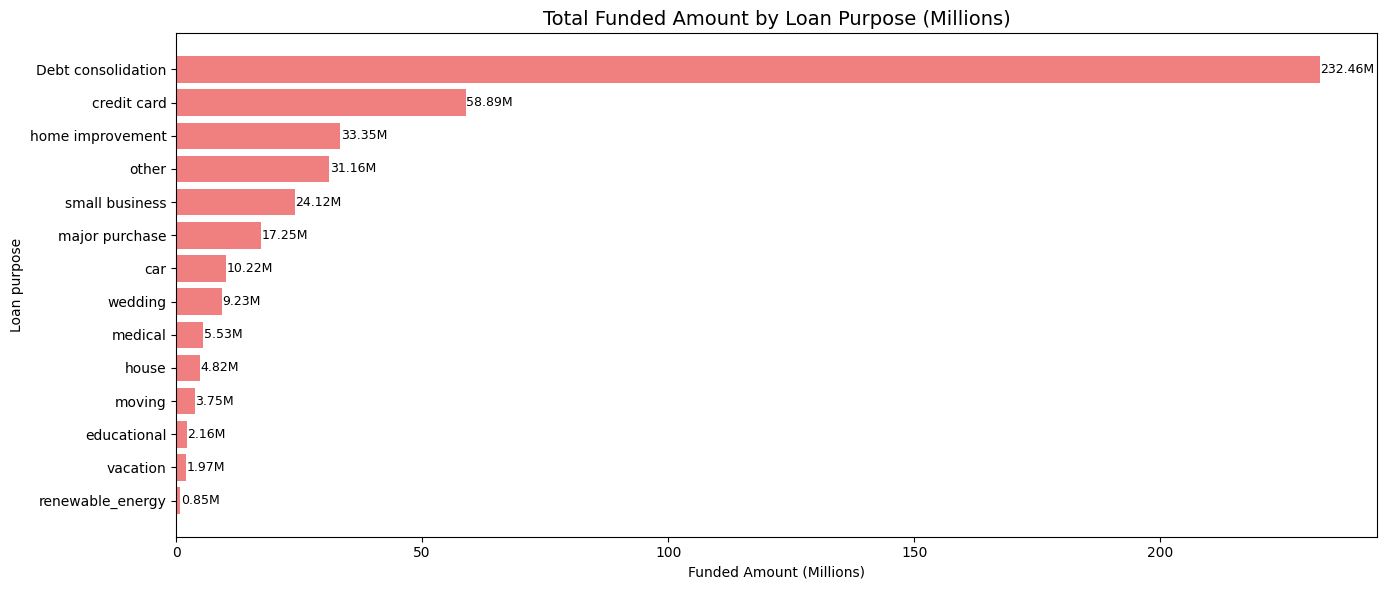

In [67]:
purpose_funding_millions = (df.groupby('purpose')['loan_amount'].sum().sort_values() / 1000000)

plt.figure(figsize=(14, 6))
bars = plt.barh(purpose_funding_millions.index, purpose_funding_millions.values, color='lightcoral')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height() / 2,
             f"{width:,.2f}M",
             va='center', fontsize=9)

plt.title('Total Funded Amount by Loan Purpose (Millions)', fontsize=14)
plt.xlabel('Funded Amount (Millions)')
plt.ylabel('Loan purpose')
plt.tight_layout()
plt.show()

###5B. Loan Purpose Breakdown by Total Amount Received

###5C. Loan Purpose Breakdown by Total Loan Applications

##6. Home Ownership Analysis (Tree/Heat Map)

###6A. Home Ownership Analysis by Total Funded Amount

In [70]:
home_funding = df.groupby('home_ownership')['loan_amount'].sum().reset_index()
home_funding['loan_amount_millions'] = home_funding['loan_amount'] / 1000000
#px. is used to create tree map (like advanced map)
fig = px.treemap(
    home_funding,
    path=['home_ownership'],
    values='loan_amount_millions',
    color='loan_amount_millions',
    color_continuous_scale='RdBu',
    title='Total Funded Amount by Home Ownership (Millions)',
)

fig.show()

###6B. Home Ownership Analysis by Total Amount Received

###6C. Home Ownership Analysis by Total Loan Applications